### Customer Segmentation Using K-Means Clustering | Machine Learning | GeeksforGeeks
https://www.youtube.com/watch?v=7J3mz9LMjqg

## 1) Entendendo os dados
- Importar bibliotecas
- Entender os dados
- Checar valores nulos
- Preparar dados para agrupamento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Tamanho do df:", df.shape, "\n")
df.info()

Tamanho do df: (200, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## 2) Usando o método do cotovelo para achar o número ideal de *clusters*
- Usar **K-Means** para iterar de 1 a 11 e plotar uma curva de cotovelo
- Decidir o número ideal de agrupamentos a usar

In [6]:
from sklearn.cluster import KMeans
wcss = []

In [7]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

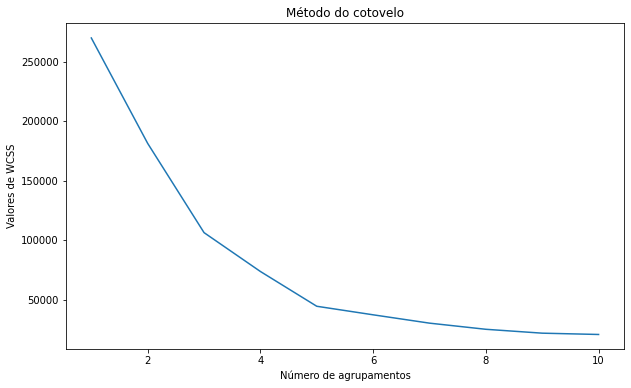

In [12]:
plt.plot(range(1,11), wcss)
plt.title("Método do cotovelo")
plt.xlabel("Número de agrupamentos")
plt.ylabel("Valores de WCSS")
plt.show();

## 3) Treinar um modelo usando um algoritmo de aprendizado não-supervisionado (K-Means)
- Iniciar o modelo **K-Means** com o número selecionado de agrupamentos
- Plotar os agrupamentos para chegar a conclusões sobre os consumidores

In [13]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)

In [14]:
y_kmeans = kmeansmodel.fit_predict(X)

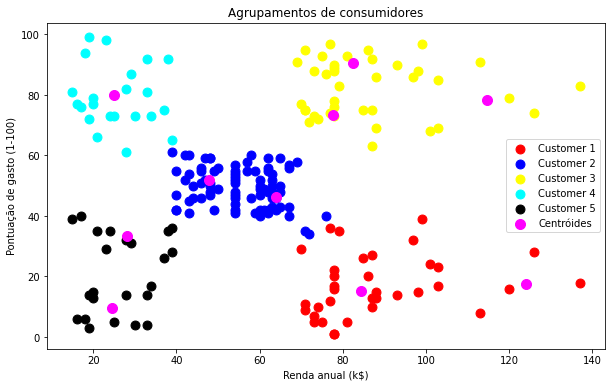

In [15]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c='red', label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c='blue', label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c='yellow', label='Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c='cyan', label='Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c='black', label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centróides')
plt.title("Agrupamentos de consumidores")
plt.xlabel("Renda anual (k$)")
plt.ylabel("Pontuação de gasto (1-100)")
plt.legend()
plt.show();